이 데이터는 특징을 가지고 당요병의 진행도를 예측하기 위해 사용된다.

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [6]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size = 0.2, random_state= 0)

In [12]:
train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
74,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003712,0.073480,85.0
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042572,-0.005220,137.0
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,53.0
389,-0.005515,0.050680,0.001339,-0.084857,-0.011201,-0.016658,0.048640,-0.039493,-0.041180,-0.088062,51.0
154,0.067136,0.050680,0.020739,-0.005671,0.020446,0.026243,-0.002903,-0.002592,0.008640,0.003064,197.0
...,...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129019,0.056912,248.0
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029528,-0.059067,91.0
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612,281.0
47,-0.078165,-0.044642,-0.073030,-0.057314,-0.084126,-0.074277,-0.024993,-0.039493,-0.018118,-0.083920,142.0


모든 데이터에 대해서 특징을 target 정답열과 상관관계를 그린다.

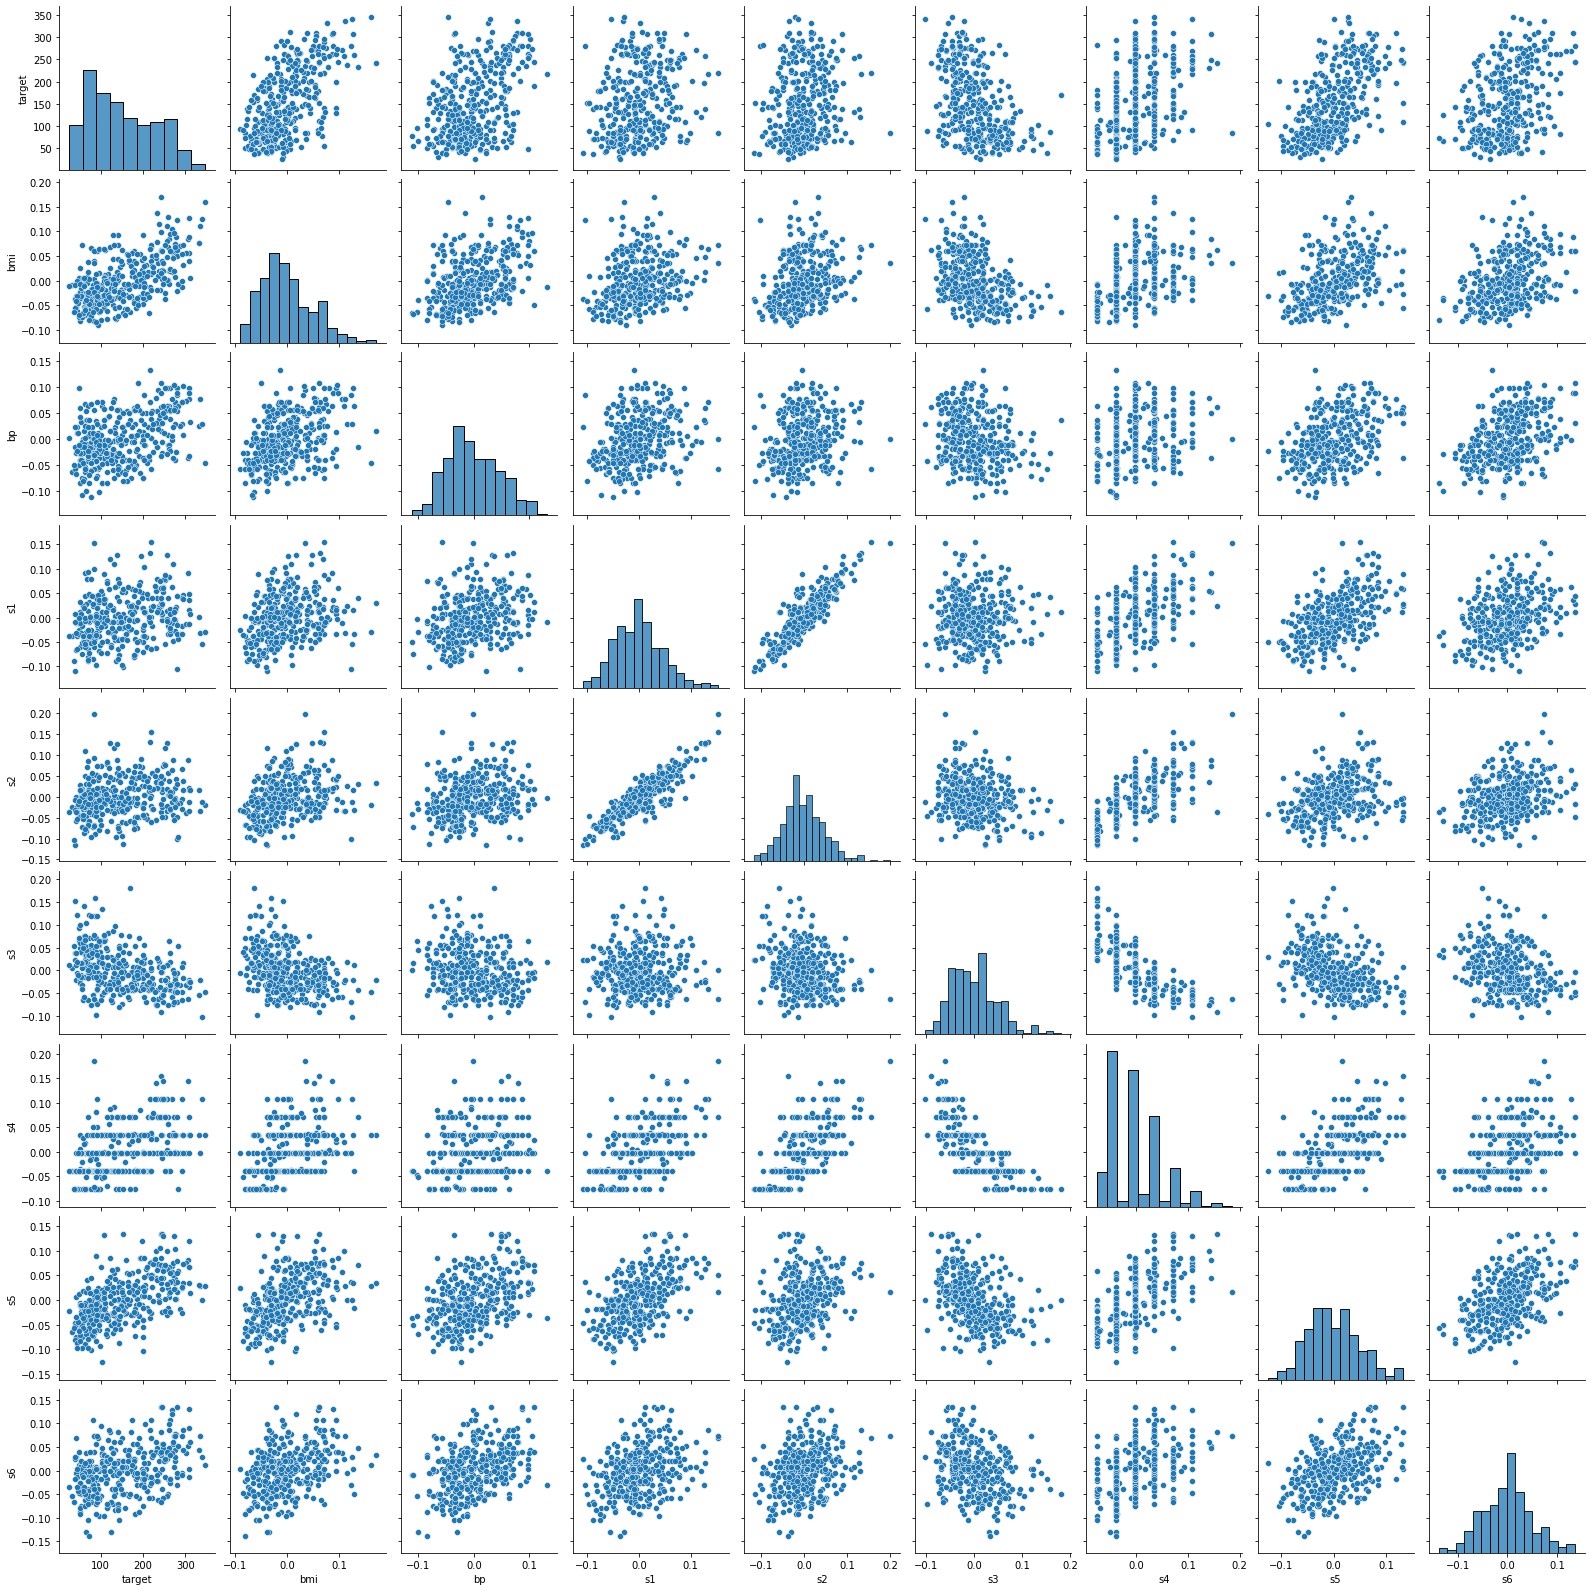

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train[["target", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]])
plt.show()

상관과계를 출력한다.

In [28]:
train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.182548,0.205760,0.375236,0.292377,0.256674,-0.102400,0.238274,0.284500,0.313088,0.187709
sex,0.182548,1.000000,0.099155,0.254952,0.048496,0.144873,-0.357021,0.311271,0.148841,0.225502,0.040009
bmi,0.205760,0.099155,1.000000,0.408624,0.263397,0.274833,-0.386691,0.424186,0.454696,0.386804,0.612887
bp,0.375236,0.254952,0.408624,1.000000,0.260952,0.197420,-0.210953,0.282850,0.415110,0.400119,0.442845
s1,0.292377,0.048496,0.263397,0.260952,1.000000,0.889398,0.013789,0.555234,0.526624,0.344607,0.210114
s2,0.256674,0.144873,0.274833,0.197420,0.889398,1.000000,-0.223301,0.657284,0.308194,0.302232,0.160665
s3,-0.102400,-0.357021,-0.386691,-0.210953,0.013789,-0.223301,1.000000,-0.754259,-0.412926,-0.301337,-0.429634
s4,0.238274,0.311271,0.424186,0.282850,0.555234,0.657284,-0.754259,1.000000,0.625293,0.441797,0.447861
s5,0.284500,0.148841,0.454696,0.415110,0.526624,0.308194,-0.412926,0.625293,1.000000,0.485498,0.587840
s6,0.313088,0.225502,0.386804,0.400119,0.344607,0.302232,-0.301337,0.441797,0.485498,1.000000,0.381622


아래는 target과 상관관계가 높은 4개의 특징 열 데이터를 추출한다.  
"bmi","bp", "s3","s5"

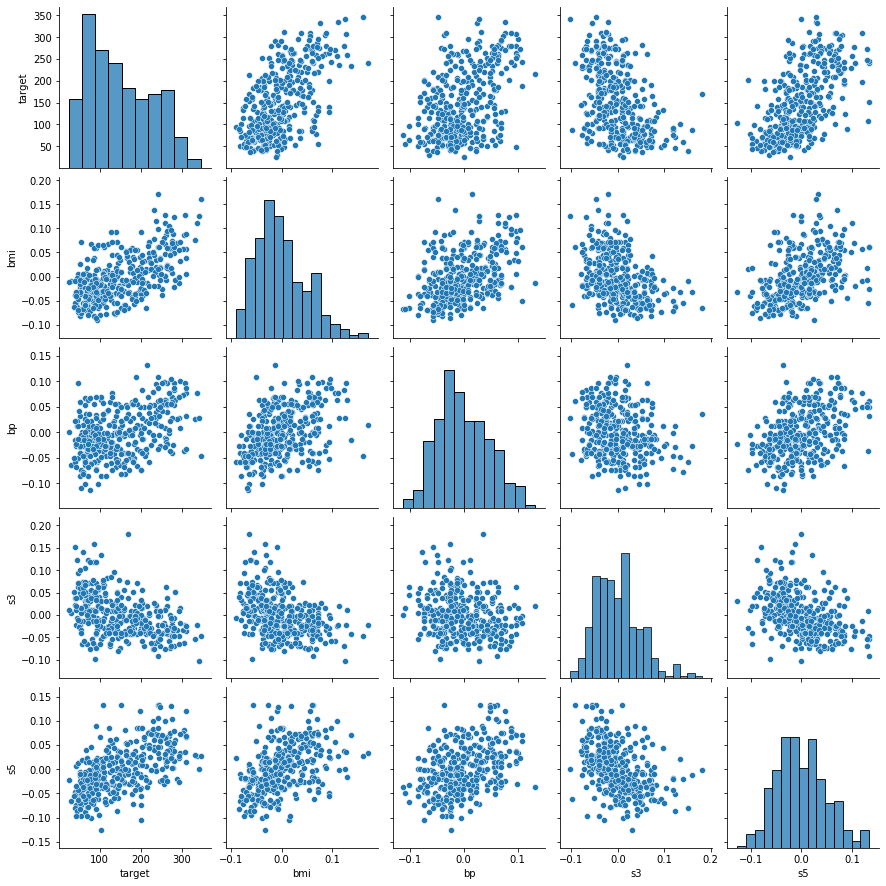

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train[["target", "bmi","bp", "s3","s5"]])
plt.show()

아래와 같이 이상값을 제거해 준다.

In [36]:
df2=train.drop(train[(train["bp"]<0)&(train["target"]>330)].index ,axis = 0)
df2=df2.drop(train[(train["bp"]>0.07)&(train["target"]<70)].index ,axis = 0)
df2=df2.drop(train[(train["s3"]>0.18)&(train["target"]>150)].index ,axis = 0)

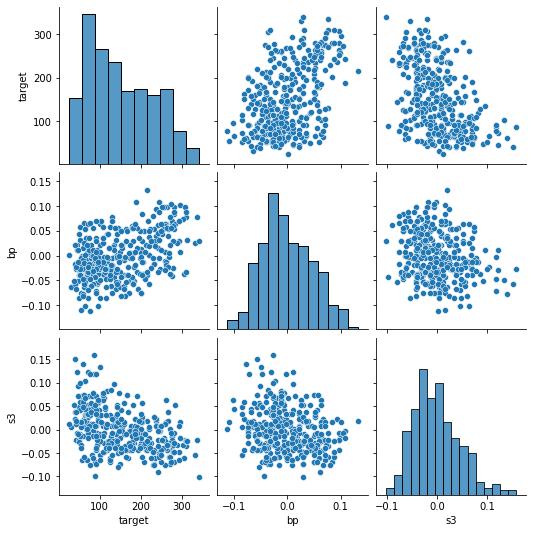

In [37]:
sns.pairplot(df2[["target", "bp", "s3"]])
plt.show()

이상값을 제거한 후에 다시한번 상관계수를 출력한다.

In [57]:
df2.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.000920,0.002202,-0.000989,-0.000913,-0.000476,-0.000609,-0.000783,0.000661,-0.000084,-0.000107,151.294286
std,0.048565,0.047722,0.048276,0.046916,0.047351,0.047231,0.046262,0.048069,0.049235,0.049542,77.851535
min,-0.107226,-0.044642,-0.090275,-0.112400,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.038207,-0.044642,-0.036385,-0.036656,-0.034592,-0.029967,-0.032356,-0.039493,-0.033249,-0.034215,84.000000
50%,0.005383,-0.044642,-0.008362,-0.005671,-0.004321,-0.003819,-0.006584,-0.002592,-0.005145,-0.001078,139.000000
75%,0.038076,0.050680,0.030440,0.032201,0.026982,0.024991,0.026550,0.034309,0.031193,0.027917,214.000000
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.159089,0.185234,0.133599,0.135612,341.000000


뽑아낸 4개의 특징만 가지고 모델을 학습시킨다.

In [59]:
col = ["bmi","bp", "s3","s5"]
x=df2[col]
t=df2[['target']]

x_train, x_val, y_train, y_val = train_test_split(x,t,test_size = 0.2, random_state= 0)

이번에는 특징의 표준화를 해준다.

In [49]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

sc_x = sc_model_x.transform(x_train)
print(sc_x.shape)
sc_x

(280, 4)


array([[-0.70696766, -0.35261947,  0.32375738, -0.59336854],
       [ 1.28398405,  0.64444248, -1.18910101,  2.66953808],
       [-0.04331709, -0.27966372,  1.67736753,  0.0690525 ],
       ...,
       [ 1.44417556, -0.13375221, -0.552108  ,  0.90695855],
       [ 1.19244604,  1.61718584, -0.79098038,  2.39657468],
       [-0.18062411,  0.44989381, -0.552108  ,  0.23028952]])

표쥰화가 잘 되었는지 평균값과 표준편차가 각각 0,1인지 확인

In [50]:
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
tmp_df.mean()

bmi   -2.973812e-17
bp    -5.670068e-17
s3     6.740640e-18
s5    -3.271193e-18
dtype: float64

In [45]:
tmp_df.std()

bmi    1.001791
bp     1.001791
s3     1.001791
s5     1.001791
dtype: float64

In [51]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

표준화를 한 특징과 정답 열의 상관관계를 다시 그려준다.

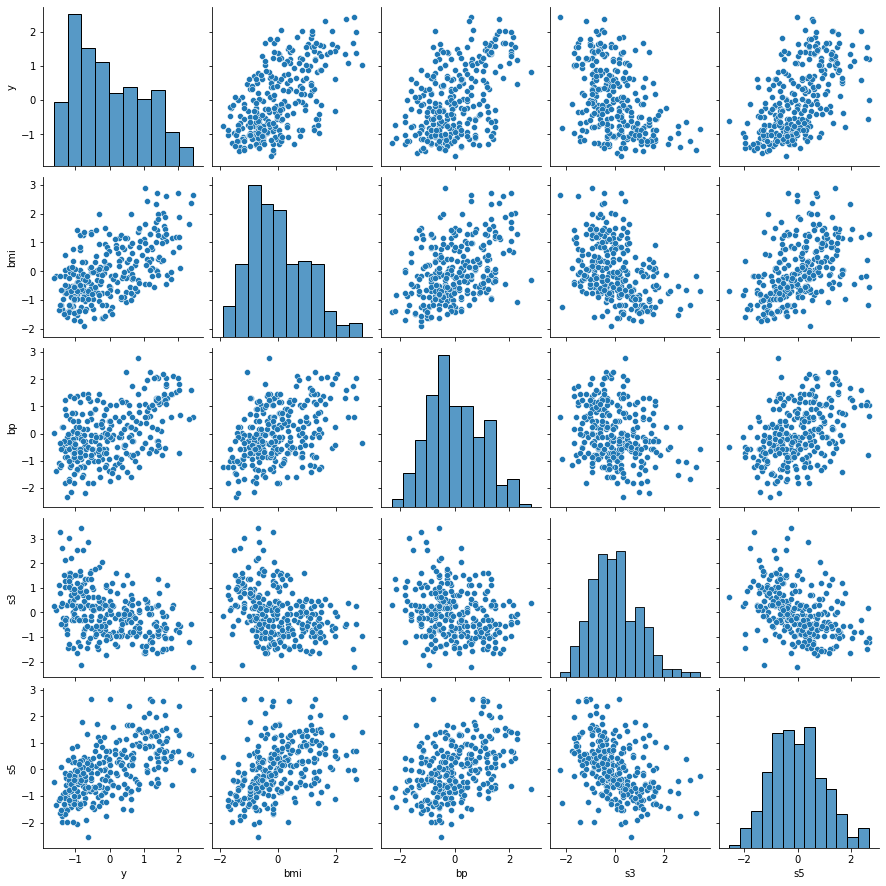

In [55]:
tmp_df['y']= sc_y

sns.pairplot(tmp_df[["y","bmi","bp", "s3","s5"]])
tmp_df=tmp_df.drop(["y"],axis=1)
plt.show()

In [56]:
tmp_df

,bmi,bp,s3,s5
0,-0.706968,-0.352619,0.323757,-0.593369
1,1.283984,0.644442,-1.189101,2.669538
2,-0.043317,-0.279664,1.677368,0.069053
3,0.414373,1.252407,-0.631732,0.605909
4,-0.821390,-0.279664,-0.153987,0.605909
...,...,...,...,...
275,-0.134855,0.595805,-1.268725,0.567771
276,1.306869,1.106496,-0.631732,1.080093
277,1.444176,-0.133752,-0.552108,0.906959
278,1.192446,1.617186,-0.790980,2.396575


전처리가 완료된 특징과 정답데이터를 가지고 모델을 학습시킨뒤 정확도를 계산한다.

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)

In [62]:
model.score(sc_x_val,sc_y_val)

0.5397850572794773

위에 과정을 반복할 수 있는 learn 함수 구현

In [65]:
def learn(x,t):
    x_train, x_val, y_train, y_val = train_test_split(x,t,test_size = 0.2, random_state= 0)    

    sc_model_x=StandardScaler()
    sc_model_y=StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    
    return train_score, val_score

In [74]:
col = ["bmi","bp", "s3","s5"]
x=df2[col]
t=df2[['target']]

s1,s2 = learn(x,t)
print(s1,s2)

0.522197597415477 0.5397850572794773


정확도가 높아지도록 특징을 곱한 것을 모델에 학습시켜 본다.

In [93]:
df2["bmi^2"] = df2["bmi"]**2
df2["bp^2"] = df2["bp"]**2
df2["s3^2"] = df2["s3"]**2
df2["s5^2"] = df2["s5"]**2
temp=df2["target"]
df2=df2.drop('target',axis=1)
df2["target"]=temp

In [94]:
df2["bmi^3"] = df2["bmi"]**3
df2["bp^3"] = df2["bp"]**3
df2["s3^3"] = df2["s3"]**3
df2["s5^3"] = df2["s5"]**3
temp=df2["target"]
df2=df2.drop('target',axis=1)
df2["target"]=temp

In [95]:
df2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi^2,bp^2,s3^2,s5^2,bmi^3,bp^3,s3^3,s5^3,target
74,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003712,0.073480,0.000006,0.003170,0.001704,0.000014,1.411183e-08,1.784636e-04,7.032647e-05,5.113662e-08,85.0
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042572,-0.005220,0.005982,0.000693,0.000705,0.001812,-4.626352e-04,-1.824927e-05,1.871574e-05,-7.715701e-05,137.0
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,0.001247,0.001037,0.000105,0.000224,-4.401270e-05,3.338926e-05,-1.081975e-06,-3.345706e-06,53.0
389,-0.005515,0.050680,0.001339,-0.084857,-0.011201,-0.016658,0.048640,-0.039493,-0.041180,-0.088062,0.000002,0.007201,0.002366,0.001696,2.399271e-09,-6.110228e-04,1.150756e-04,-6.983469e-05,51.0
154,0.067136,0.050680,0.020739,-0.005671,0.020446,0.026243,-0.002903,-0.002592,0.008640,0.003064,0.000430,0.000032,0.000008,0.000075,8.920420e-06,-1.823432e-07,-2.446047e-08,6.450359e-07,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129019,0.056912,0.000053,0.002442,0.002964,0.016646,-3.864275e-07,1.206660e-04,-1.613958e-04,2.147658e-03,248.0
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029528,-0.059067,0.000961,0.000066,0.001150,0.000872,-2.977841e-05,5.316127e-07,3.900495e-05,-2.574456e-05,91.0
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612,0.000453,0.007619,0.002217,0.006260,-9.657233e-06,6.650391e-04,-1.043706e-04,4.953095e-04,281.0
47,-0.078165,-0.044642,-0.073030,-0.057314,-0.084126,-0.074277,-0.024993,-0.039493,-0.018118,-0.083920,0.005333,0.003285,0.000625,0.000328,-3.895017e-04,-1.882672e-04,-1.561124e-05,-5.947713e-06,142.0


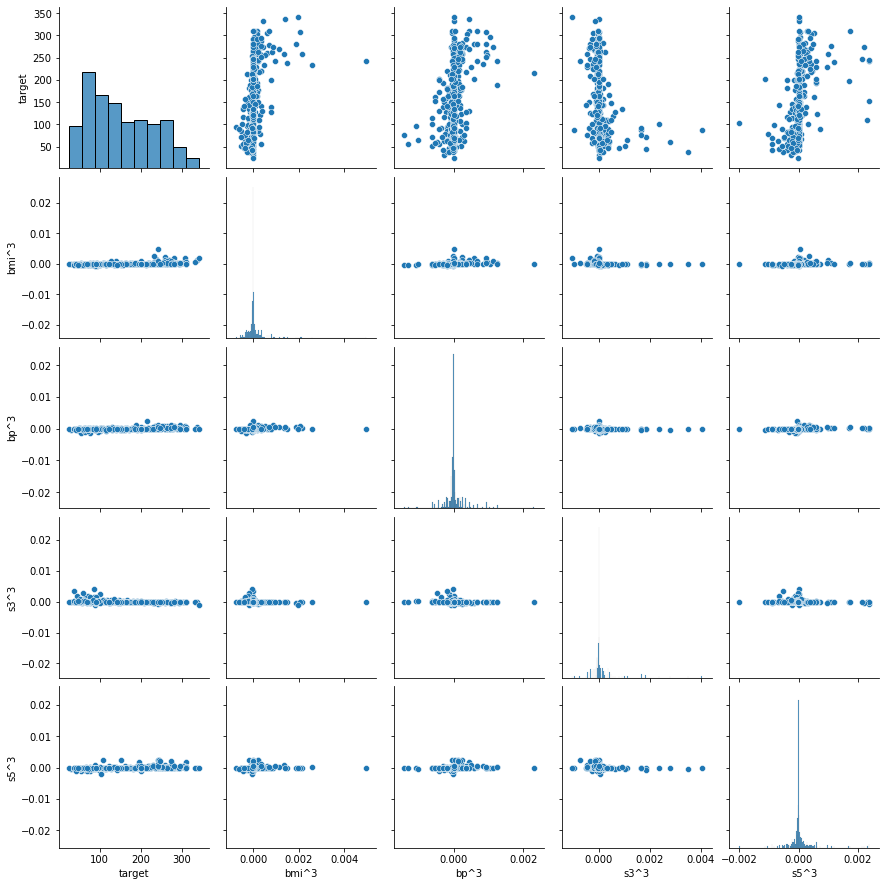

In [96]:
sns.pairplot(df2[["target","bmi^3","bp^3", "s3^3","s5^3"]])
plt.show()

In [97]:
df2.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi^2,bp^2,s3^2,s5^2,bmi^3,bp^3,s3^3,s5^3,target
age,1.000000,0.182074,0.223320,0.377304,0.291108,0.259266,-0.116076,0.245119,0.287478,0.317913,-0.148574,-0.006295,0.092145,0.000237,0.101710,0.213642,-0.012586,0.195310,0.195552
sex,0.182074,1.000000,0.107401,0.263468,0.048128,0.140135,-0.355739,0.309373,0.151812,0.225237,-0.052021,-0.093484,-0.051133,0.015755,0.106318,0.164928,-0.203596,0.050974,0.044579
bmi,0.223320,0.107401,1.000000,0.431396,0.275186,0.280049,-0.379987,0.421794,0.457730,0.388415,0.432457,0.136056,-0.131616,0.030171,0.748812,0.360117,-0.227144,0.258767,0.608683
bp,0.377304,0.263468,0.431396,1.000000,0.260309,0.203719,-0.238145,0.297336,0.418978,0.405728,0.100249,0.185740,-0.113734,0.096651,0.299827,0.826787,-0.180170,0.309305,0.466257
s1,0.291108,0.048128,0.275186,0.260309,1.000000,0.892660,0.008915,0.561305,0.528164,0.346503,-0.070610,-0.018765,0.044301,0.139073,0.122027,0.175796,0.058005,0.385889,0.217274
s2,0.259266,0.140135,0.280049,0.203719,0.892660,1.000000,-0.215539,0.656760,0.310091,0.300514,-0.078039,-0.053474,-0.102991,-0.090764,0.133005,0.136934,-0.139638,0.114204,0.165036
s3,-0.116076,-0.355739,-0.379987,-0.238145,0.008915,-0.215539,1.000000,-0.754640,-0.423110,-0.298412,-0.073849,-0.040238,0.398237,-0.085103,-0.232293,-0.165494,0.743725,-0.280032,-0.436060
s4,0.245119,0.309373,0.421794,0.297336,0.561305,0.656760,-0.754640,1.000000,0.628402,0.440296,0.040473,0.009284,-0.088417,0.204821,0.249405,0.200048,-0.465638,0.457791,0.448326
s5,0.287478,0.151812,0.457730,0.418978,0.528164,0.310091,-0.423110,0.628402,1.000000,0.485987,0.051547,0.092652,-0.056851,0.259319,0.257011,0.293834,-0.226323,0.800580,0.591830
s6,0.317913,0.225237,0.388415,0.405728,0.346503,0.300514,-0.298412,0.440296,0.485987,1.000000,0.087154,0.090990,-0.040650,0.089449,0.235035,0.312585,-0.123501,0.346674,0.386565


In [91]:
col = ["bmi","bp", "s3","s5","bmi^3"]
x=df2[col]
t=df2[['target']]

s1,s2 = learn(x,t)
print(s1,s2)

0.5230924016138127 0.5277520405150222


In [102]:
df2["bmi*s5"] = df2["bmi"]*df2["s5"]
df2["bmi*bp"] = df2["bmi"]*df2["bp"]
df2["bmi*s3"] = df2["bmi"]*df2["s3"]
temp=df2["target"]
df2=df2.drop('target',axis=1)
df2["target"]=temp

In [109]:
col = ["bmi","bp", "s3","s5","bmi*bp"]
x=df2[col]
t=df2[['target']]

s1,s2 = learn(x,t)
print(s1,s2)

0.5480063756544542 0.5158172959155352


정확도가 오히려 낮아졌다.

In [103]:
df2.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s3^2,s5^2,bmi^3,bp^3,s3^3,s5^3,bmi*s5,bmi*bp,bmi*s3,target
age,1.000000,0.182074,0.223320,0.377304,0.291108,0.259266,-0.116076,0.245119,0.287478,0.317913,...,0.092145,0.000237,0.101710,0.213642,-0.012586,0.195310,-0.117329,-0.126807,0.013080,0.195552
sex,0.182074,1.000000,0.107401,0.263468,0.048128,0.140135,-0.355739,0.309373,0.151812,0.225237,...,-0.051133,0.015755,0.106318,0.164928,-0.203596,0.050974,0.022301,-0.016083,0.084607,0.044579
bmi,0.223320,0.107401,1.000000,0.431396,0.275186,0.280049,-0.379987,0.421794,0.457730,0.388415,...,-0.131616,0.030171,0.748812,0.360117,-0.227144,0.258767,0.084141,0.119806,-0.141387,0.608683
bp,0.377304,0.263468,0.431396,1.000000,0.260309,0.203719,-0.238145,0.297336,0.418978,0.405728,...,-0.113734,0.096651,0.299827,0.826787,-0.180170,0.309305,0.029756,0.141210,0.017843,0.466257
s1,0.291108,0.048128,0.275186,0.260309,1.000000,0.892660,0.008915,0.561305,0.528164,0.346503,...,0.044301,0.139073,0.122027,0.175796,0.058005,0.385889,-0.051691,-0.160013,0.013003,0.217274
s2,0.259266,0.140135,0.280049,0.203719,0.892660,1.000000,-0.215539,0.656760,0.310091,0.300514,...,-0.102991,-0.090764,0.133005,0.136934,-0.139638,0.114204,-0.124872,-0.216618,0.142938,0.165036
s3,-0.116076,-0.355739,-0.379987,-0.238145,0.008915,-0.215539,1.000000,-0.754640,-0.423110,-0.298412,...,0.398237,-0.085103,-0.232293,-0.165494,0.743725,-0.280032,0.009449,0.028597,-0.253484,-0.436060
s4,0.245119,0.309373,0.421794,0.297336,0.561305,0.656760,-0.754640,1.000000,0.628402,0.440296,...,-0.088417,0.204821,0.249405,0.200048,-0.465638,0.457791,0.027156,-0.091125,0.064759,0.448326
s5,0.287478,0.151812,0.457730,0.418978,0.528164,0.310091,-0.423110,0.628402,1.000000,0.485987,...,-0.056851,0.259319,0.257011,0.293834,-0.226323,0.800580,0.022717,0.018512,0.000589,0.591830
s6,0.317913,0.225237,0.388415,0.405728,0.346503,0.300514,-0.298412,0.440296,0.485987,1.000000,...,-0.040650,0.089449,0.235035,0.312585,-0.123501,0.346674,0.087963,-0.026117,-0.053386,0.386565


In [105]:
df3=df2.drop(['bmi*s3',"bmi*bp","bmi*s5"],axis=1)

In [106]:
df3

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi^2,bp^2,s3^2,s5^2,bmi^3,bp^3,s3^3,s5^3,target
74,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003712,0.073480,0.000006,0.003170,0.001704,0.000014,1.411183e-08,1.784636e-04,7.032647e-05,5.113662e-08,85.0
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042572,-0.005220,0.005982,0.000693,0.000705,0.001812,-4.626352e-04,-1.824927e-05,1.871574e-05,-7.715701e-05,137.0
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014956,-0.050783,0.001247,0.001037,0.000105,0.000224,-4.401270e-05,3.338926e-05,-1.081975e-06,-3.345706e-06,53.0
389,-0.005515,0.050680,0.001339,-0.084857,-0.011201,-0.016658,0.048640,-0.039493,-0.041180,-0.088062,0.000002,0.007201,0.002366,0.001696,2.399271e-09,-6.110228e-04,1.150756e-04,-6.983469e-05,51.0
154,0.067136,0.050680,0.020739,-0.005671,0.020446,0.026243,-0.002903,-0.002592,0.008640,0.003064,0.000430,0.000032,0.000008,0.000075,8.920420e-06,-1.823432e-07,-2.446047e-08,6.450359e-07,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129019,0.056912,0.000053,0.002442,0.002964,0.016646,-3.864275e-07,1.206660e-04,-1.613958e-04,2.147658e-03,248.0
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029528,-0.059067,0.000961,0.000066,0.001150,0.000872,-2.977841e-05,5.316127e-07,3.900495e-05,-2.574456e-05,91.0
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612,0.000453,0.007619,0.002217,0.006260,-9.657233e-06,6.650391e-04,-1.043706e-04,4.953095e-04,281.0
47,-0.078165,-0.044642,-0.073030,-0.057314,-0.084126,-0.074277,-0.024993,-0.039493,-0.018118,-0.083920,0.005333,0.003285,0.000625,0.000328,-3.895017e-04,-1.882672e-04,-1.561124e-05,-5.947713e-06,142.0


In [112]:
col = ["bmi","bp", "s3","s5"]
x=df3[col]
t=df3[['target']]

sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)

model = LinearRegression()
model.fit(sc_x,sc_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

테스트 데이터로 정확도 확인

In [114]:
test.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [116]:
x_test = test[col]
y_test = test[['target']]

sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

model.score(sc_x_test,sc_y_test)

0.3375438389068176

(11장 릿지회귀) 

In [132]:
from sklearn.linear_model import Ridge

model2 = Ridge(alpha = 160)
model2.fit(sc_x,sc_y)

Ridge(alpha=160, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
model2.score(sc_x_test,sc_y_test)

0.34584642951035993

In [136]:
model2.coef_

array([[ 0.26180261,  0.15090965, -0.1363623 ,  0.24093123]])